In [117]:
import pandas as pd
import numpy as np
import scipy as scipy
import os
from natsort import os_sorted
from Levenshtein import distance as levenshtein_distance
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from IPython.display import clear_output
from matplotlib_venn import venn2
from matplotlib_venn import venn3
plt.rcParams['axes.facecolor'] = 'white'

In [123]:
# LIST THE DIRECTORIES OF THE NECESSARY BARCODE AND SAM FILES

mae_008_dir= '../../../tn-seq_data/tn-seq_outputs/mae-008/seqkit_filtering_RB/'
mae_008_sam_file_dir =  '../../../tn-seq_data/tn-seq_outputs/mae-008/bowtie2_output_RB/'

mae_009_dir= '../../../tn-seq_data/tn-seq_outputs/mae-009/seqkit_filtering_RB/'
mae_009_sam_file_dir =  '../../../tn-seq_data/tn-seq_outputs/mae-009/bowtie2_output_RB/'

mae_010_dir= '../../../tn-seq_data/tn-seq_outputs/mae-010/seqkit_filtering_RB/'
mae_010_sam_file_dir =  '../../../tn-seq_data/tn-seq_outputs/mae-010/bowtie2_output_RB/'


In [120]:
### MAKE THE BARCODES <-> POSITIONS CROSS-REFERENCING CSV FILE FOR EACH SAMPLE
# NOTE: THIS IS ALSO DONE BY DEFAULT IN SCRIPT src/01C_
# SKIP THIS IF YOU HAVE ALREADY GENERATED THE LOOKUP CSV FILES

# MAE-008
for file in os_sorted(os.listdir(mae_008_dir)):
    if file.endswith("barcodes.txt"):
        #print(file)
        sam_file_path = mae_008_sam_file_dir+file[:-12]+"mapped.sam"
        mae_008_bc_location_cross_ref = barcode_to_position_mapper(mae_008_dir+file, sam_file_path)

# MAE-009
for file in os_sorted(os.listdir(mae_009_dir)):
    if file.endswith("barcodes.txt"):
        #print(file)
        sam_file_path = mae_009_sam_file_dir+file[:-12]+"mapped.sam"
        mae_009_bc_location_cross_ref = barcode_to_position_mapper(mae_009_dir+file, sam_file_path)



There are no aligned reads in the sam file for../../../tn-seq_data/tn-seq_outputs/mae-009/bowtie2_output_RB/BCv2-12_S12_L001_mapped.sam


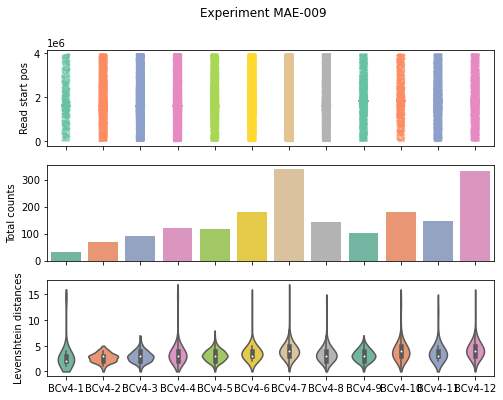

In [124]:
barcode_distances_df,barcode_count_df,barcode_start_positions_df = barcode_qc_analysis(mae_010_dir)

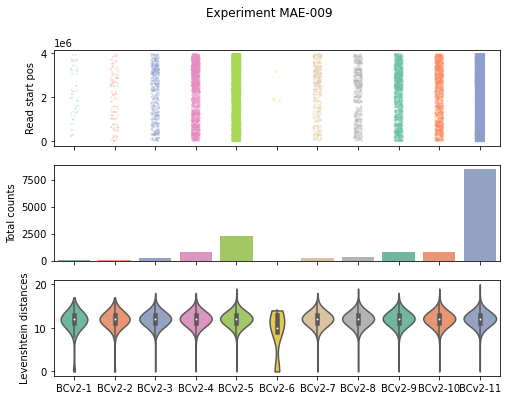

In [122]:
barcode_distances_df,barcode_count_df,barcode_start_positions_df = barcode_qc_analysis(mae_009_dir)

In [131]:
mae_008_annotated = '../../../tn-seq_data/tn-seq_outputs/mae-008/RbTnseq_preprocessing/'
mae_009_annotated = '../../../tn-seq_data/tn-seq_outputs/mae-009/RbTnseq_preprocessing/'
mae_010_annotated = '../../../tn-seq_data/tn-seq_outputs/mae-010/RbTn-seq_preprocessing/'

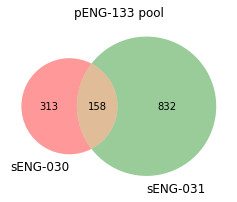

In [70]:
barcode_positions_annotated = pd.DataFrame()

for file in os_sorted(os.listdir(mae_008_annotated)):
    if file.endswith("annotated_reads.csv"):
        new_insert_locations = pd.DataFrame()
        filename = file.split('_')[0]
        df = pd.read_csv(mae_008_annotated+file, sep=",", header=0)
        new_insert_locations[filename] = df['gene1']
        barcode_positions_annotated = pd.concat([barcode_positions_annotated, new_insert_locations], axis=1)

barcode_positions_annotated = barcode_positions_annotated.replace({0:pd.NA})

BC_1_set = set(barcode_positions_annotated['BC-1'])
BC_2_set = set(barcode_positions_annotated['BC-2'])

BC_3_set = set(barcode_positions_annotated['BC-3'])
BC_4_set = set(barcode_positions_annotated['BC-4'])


BC_5_set = set(barcode_positions_annotated['BC-5'])
BC_7_set = set(barcode_positions_annotated['BC-7'])
BC_8_set = set(barcode_positions_annotated['BC-8'])

BC_6_set = set(barcode_positions_annotated['BC-6'])
BC_9_set = set(barcode_positions_annotated['BC-9'])
BC_10_set = set(barcode_positions_annotated['BC-10'])


plt.figure(figsize=(4,4),facecolor='white')
v = venn2([BC_3_set, BC_4_set], ('sENG-030', 'sENG-031'))
plt.title("pENG-133 pool")

plt.show()

filenumber 0 is col BCv4-1
filenumber 1 is col BCv4-2
filenumber 2 is col BCv4-3
filenumber 3 is col BCv4-4
filenumber 4 is col BCv4-5
filenumber 5 is col BCv4-6
filenumber 6 is col BCv4-7
filenumber 7 is col BCv4-8
filenumber 8 is col BCv4-9
filenumber 9 is col BCv4-10
filenumber 10 is col BCv4-11
filenumber 11 is col BCv4-12


Text(69.0, 0.5, 'Sample B')

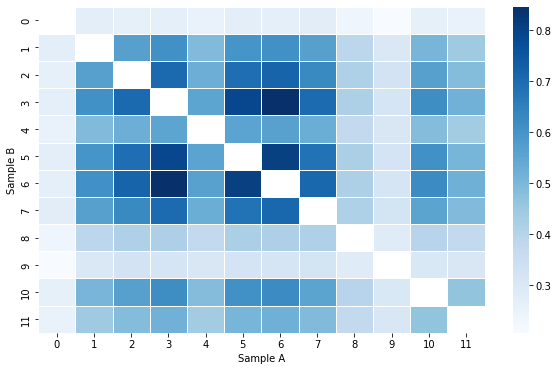

In [133]:
barcode_positions_annotated = pd.DataFrame()

for file in os_sorted(os.listdir(mae_010_annotated)):
    if file.endswith("annotated_reads.csv"):
        new_insert_locations = pd.DataFrame()
        filename = file.split('_')[0]
        df = pd.read_csv(mae_010_annotated+file, sep=",", header=0)
        new_insert_locations[filename] = df['gene1']
        barcode_positions_annotated = pd.concat([barcode_positions_annotated, new_insert_locations], axis=1)

barcode_positions_annotated = barcode_positions_annotated.replace({0:pd.NA})

pairwise_intersections = np.zeros((barcode_positions_annotated.shape[1],barcode_positions_annotated.shape[1]))
pairwise_intersections_fraction_total = np.zeros((barcode_positions_annotated.shape[1],barcode_positions_annotated.shape[1]))
pairwise_intersections_fraction_set1 = np.zeros((barcode_positions_annotated.shape[1],barcode_positions_annotated.shape[1]))
pairwise_intersections_fraction_set2 = np.zeros((barcode_positions_annotated.shape[1],barcode_positions_annotated.shape[1]))


filenumber_1 = 0
for col1 in barcode_positions_annotated:
    set1=set(barcode_positions_annotated[col1])
    print('filenumber '+str(filenumber_1)+' is col '+col1)
    filenumber_2 = 0
    for col2 in barcode_positions_annotated:
        set2=set(barcode_positions_annotated[col2])
        
        if col1 == col2:
            pairwise_intersections[filenumber_1,filenumber_2] = np.nan
            pairwise_intersections_fraction_total[filenumber_1,filenumber_2] = np.nan
            pairwise_intersections_fraction_set1[filenumber_1,filenumber_2] = np.nan
            pairwise_intersections_fraction_set2[filenumber_1,filenumber_2] = np.nan
            
        else: 
            if len(set1) != 0 and len(set2) != 0:
                pairwise_intersections[filenumber_1,filenumber_2] = len(set1.intersection(set2))
                pairwise_intersections_fraction_total[filenumber_1,filenumber_2] = len(set1.intersection(set2))/len(set1.union(set2))
                pairwise_intersections_fraction_set1[filenumber_1,filenumber_2] = len(set1.intersection(set2))/len(set1)
                pairwise_intersections_fraction_set2[filenumber_1,filenumber_2] = len(set1.intersection(set2))/len(set2)
            elif len(set1) == 0 and len(set2) == 0:
                pairwise_intersections[filenumber_1,filenumber_2] = None
                pairwise_intersections_fraction_total[filenumber_1,filenumber_2] = None
                pairwise_intersections_fraction_set1[filenumber_1,filenumber_2] = None
                pairwise_intersections_fraction_set2[filenumber_1,filenumber_2] = None
            elif len(set1) == 0 and len(set2) != 0:
                pairwise_intersections[filenumber_1,filenumber_2] = len(set1.intersection(set2))
                pairwise_intersections_fraction_total[filenumber_1,filenumber_2] = len(set1.intersection(set2))/(len(set1)+len(set2))
                pairwise_intersections_fraction_set1[filenumber_1,filenumber_2] = None
                pairwise_intersections_fraction_set2[filenumber_1,filenumber_2] = len(set1.intersection(set2))/len(set2)
            elif len(set1) != 0 and len(set2) == 0:
                pairwise_intersections[filenumber_1,filenumber_2] = len(set1.intersection(set2))
                pairwise_intersections_fraction_total[filenumber_1,filenumber_2] = len(set1.intersection(set2))/(len(set1)+len(set2))
                pairwise_intersections_fraction_set1[filenumber_1,filenumber_2] = len(set1.intersection(set2))/len(set1)
                pairwise_intersections_fraction_set2[filenumber_1,filenumber_2] = None
        
        filenumber_2 += 1
    
    filenumber_1 += 1


        
plt.figure(figsize=(10, 6))
ax = sns.heatmap(pairwise_intersections_fraction_total,cmap ='Blues',linewidths=1,xticklabels=True, yticklabels=True)
plt.xlabel('Sample A')
plt.ylabel('Sample B')



In [ ]:
BCv2_1_set = set(barcode_positions_annotated['BCv2-1'])
BCv2_2_set = set(barcode_positions_annotated['BCv2-2'])
BCv2_3_set = set(barcode_positions_annotated['BCv2-3'])
BCv2_4_set = set(barcode_positions_annotated['BCv2-4'])
BCv2_5_set = set(barcode_positions_annotated['BCv2-5'])
BCv2_6_set = set(barcode_positions_annotated['BCv2-6'])
BCv2_7_set = set(barcode_positions_annotated['BCv2-7'])
BCv2_8_set = set(barcode_positions_annotated['BCv2-8'])
BCv2_9_set = set(barcode_positions_annotated['BCv2-9'])
BCv2_10_set = set(barcode_positions_annotated['BCv2-10'])
BCv2_11_set = set(barcode_positions_annotated['BCv2-11'])
#BCv2_12_set = set(barcode_positions_annotated['BCv2-12'])

plt.figure(figsize=(4,4),facecolor='white')
v = venn2([BCv2_5_set, BCv2_11_set], ('5', '11'))
plt.title("pool 131 vs pool 133")

plt.show()

11

NameError: name 'pairwise_intersections' is not defined

In [3]:
def barcode_to_position_mapper(barcode_file_txt, mapped_reads_sam):
    
    
    barcode_data = pd.read_csv(barcode_file_txt, sep="\t", header=None)
    barcode_data = barcode_data[[0,6]]
    barcode_data.columns = ['read_name', 'barcode']

    ### Loop the data lines
    with open(mapped_reads_sam, 'r') as temp_f:
        # get No of columns in each line
        col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

    ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
    if len(col_count) > 0:
        column_names = [i for i in range(0, max(col_count))]
   
        ### Read csv
        alignment_data = pd.read_csv(mapped_reads_sam, sep="\t", header=None,\
                                     names=column_names)

        alignment_data = alignment_data[[0,1,3,8,9]]
        alignment_data.columns = ['read_name', 'flag','start','insert_size','sequence']


        bc_location_cross_ref = \
        pd.merge(barcode_data, alignment_data, \
                     how='inner', left_on=barcode_data['read_name'], right_on=alignment_data['read_name'], sort=False, suffixes=('_bc', '_bowtie'), \
                     copy=True, indicator=True)

        bc_location_cross_ref = bc_location_cross_ref[['read_name_bc','barcode','flag','start','insert_size']]


        output_path = barcode_file_txt[:-12]+'barcodes_positions_lookup.csv'
        bc_location_cross_ref.to_csv(output_path, sep=',')
    
    else:
        print('There are no aligned reads in the sam file for'+mapped_reads_sam)
        bc_location_cross_ref = barcode_data

    return bc_location_cross_ref

    

In [5]:
def barcode_qc_analysis(experiment_directory):

    ### ITERATE THROUGH THE LOOKUP TABLES OF THE SAMPLE DIRECTORY
    #   1. Plot barcode diversity (unique) to compare samples
    #   2. Plot barcode distance distributions
    #   3. Plot crude genome position histograms and density plots for checking insertion sites

    barcode_distances_df = pd.DataFrame()
    barcode_count_df = pd.DataFrame()
    barcode_start_positions_df = pd.DataFrame()

    for file in os_sorted(os.listdir(experiment_directory)):
        if file.endswith("lookup.csv"):
            df = pd.read_csv(experiment_directory+file, sep=",", header=0)
            num_total_barcodes = len(df['barcode'])/2
            num_unique_barcodes = len(np.unique(df['barcode']))
            barcode_count_df[file.split('_')[0]] = [num_unique_barcodes]
            unique_barcode_list = np.unique(df['barcode'])


            new_barcode_distances_df = pd.DataFrame()
            new_barcode_start_positions_df = pd.DataFrame()

            frequency_per_unique_barcode = list(sorted(zip(*np.unique(df['barcode'], return_counts=True)),key=lambda x: x[1]))
            frequencies_pooled = np.zeros(len(frequency_per_unique_barcode))
            counter=0
            for freq in frequency_per_unique_barcode:
                frequencies_pooled[counter] = int(freq[1]/2)
                counter+=1


            distances = np.zeros((len(unique_barcode_list)*len(unique_barcode_list),), dtype=int)
            counter = 0
            for i in unique_barcode_list:
                for j in unique_barcode_list:
                    distances[counter] = levenshtein_distance(i, j)
                    counter += 1

            new_barcode_distances_df[file.split('_')[0]] = distances
            barcode_distances_df = pd.concat([barcode_distances_df, new_barcode_distances_df], axis=1)

            new_barcode_start_positions_df[file.split('_')[0]] = df['start']
            barcode_start_positions_df = pd.concat([barcode_start_positions_df, new_barcode_start_positions_df], axis=1)

            ## PLOTTING
            plot_title = file.split('_')[0]
            fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(8, 6))
            fig.suptitle('Sample '+plot_title+': %s%% unique out of %s total barcodes' % ("{:.2f}".format(num_unique_barcodes/num_total_barcodes*100),num_total_barcodes))

            # distribution of counts per barcode
            sns.countplot(x=frequencies_pooled,ax=ax[0,0],color='#96d7b5',edgecolor='k')
            ax[0,0].set_xlabel('Counts per unique barcode')
            ax[0,0].set_ylabel('Count')
            sns.despine(fig=fig, ax=ax[0,0], top=True, right=True, left=False, bottom=False, offset=4, trim=False)


            # distribution of pairwise distances between barcodes
            sns.countplot(x=distances,ax=ax[1,0],color='#f28280',edgecolor='k')
            ax[1,0].set_xlabel('Pairwise Levenshtein distances between unique barcodes')
            ax[1,0].set_ylabel('Count')


            # position of mapped reads across the genome
            sns.stripplot(x=df['start'],alpha=.5,size=2,ax=ax[0,1])
            ax[0,1].set_xlabel('Read start position in genome')
            ax[0,1].set_ylabel(plot_title)


            # density of mapped reads across the genome
            sns.kdeplot(x=df['start'],cut=0,fill=True,ax=ax[1,1])
            ax[1,1].set_xlabel('Read start position in genome')

            fig.tight_layout()


            plt.savefig(experiment_directory+plot_title+'_barcode_metrics.png', dpi=300, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='white', edgecolor='white',
            backend=None)

            plt.show()
            time.sleep(2)
            clear_output(wait=True)

    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(8, 6),sharex=True)
    fig.suptitle('Experiment MAE-009')
    sns.stripplot(data=barcode_start_positions_df,ax=ax[0],palette="Set2",alpha=0.25, size=2)
    ax[0].set_ylabel('Read start pos')
    sns.barplot(data=barcode_count_df,ax=ax[1],palette="Set2",)
    ax[1].set_ylabel('Total counts')

    sns.violinplot(data=barcode_distances_df,scale='area',bw=0.5,cut=0,ax=ax[2],palette="Set2",)
    ax[2].set_ylabel('Levenshtein distances')

    plt.savefig(experiment_directory+'allsample_experiment_comparison.png', dpi=300, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='white', edgecolor='white',
            backend=None)

    plt.show()
    
    return barcode_distances_df,barcode_count_df,barcode_start_positions_df
